### Part 1 - Take Home Exercises
---

#### Contents

1. The Data
2. Data Preparation
3. Data Transformation
    - Converting Dictionary into Pandas Dataframe
    - Familiarizing yourself with the Data
        - **Exercise 2**
4. Data Mining using Pandas
    - Missing Values
        - **Exercise 5**
    - Dealing with Duplicate Data
5. Data Preprocessing
    - Sampling
        - **Exercise 6**
        - **Exercise 8**
    - Feature Creation
    - Feature subset selection
        - **Exercise 10**
        - **Exercise 11**
    - Dimensionality Reduction
        - **Exercise 12**
    - Attribute Transformation / Aggregation
        - **Exercise 13**
        - **Exercise 14**
        - **Exercise 15**
    - Discretization and Binarization
        - **Exercise 16**
6. Data Exploration

####  **Exercise 2 :** 

Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information.

-------------


In [3]:
# Data Preparation
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

In [4]:
# Converting Dictionary into Pandas Dataframe

import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [183]:
X.loc[:7, 'text':'category']

,text,category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2


#### **Exercise 5:**

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

---

In [184]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                            },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])

NA_df['isnull'] = NA_df['missing_example'].isnull()

NA_df.loc[0, 'type'] = type(NA_df.loc[0, 'missing_example'])
NA_df.loc[1, 'type'] = type(NA_df.loc[1, 'missing_example'])
NA_df.loc[2, 'type'] = type(NA_df.loc[2, 'missing_example'])
NA_df.loc[3, 'type'] = type(NA_df.loc[3, 'missing_example'])
NA_df.loc[4, 'type'] = type(NA_df.loc[4, 'missing_example'])
NA_df.loc[5, 'type'] = type(NA_df.loc[5, 'missing_example'])

NA_df

,id,missing_example,isnull,type
0,A,NaN,True,<class 'float'>
1,B,NaN,True,<class 'float'>
2,C,NaN,False,<class 'str'>
3,D,None,False,<class 'str'>
4,E,None,True,<class 'NoneType'>
5,F,,False,<class 'str'>


- A -> T : In pandas, None is also treated as a missing value. None is a built-in constant in Python.
- B -> T : Nothing there.
- C -> F : It's a string.
- D -> F : It's a string.
- E -> T : Its type is Nonetype.
- F -> F : It's a empty string.

#### **Exercise 6**

Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

---

In [6]:
X_sample = X.sample(n=1000)

In [7]:
print("X.shape:{}".format(X.shape))
print("X_sample.shape:{}".format(X_sample.shape))

X.shape:(2257, 3)
X_sample.shape:(1000, 3)


In [188]:
X[:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


In [189]:
X_sample[:10]

,text,category,category_name
1811,From: madhaus@netcom.com (Maddi Hausmann) Subj...,0,alt.atheism
1693,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
1795,From: u2i02@seq1.cc.keele.ac.uk (RJ Pomeroy) S...,3,soc.religion.christian
562,From: wquinnan@sdcc13.ucsd.edu (Malcusco) Subj...,3,soc.religion.christian
1964,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
1320,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
399,Subject: AutoCAD -> TIFF Can it be done???? Fr...,1,comp.graphics
1031,From: ken@sugra.uucp (Kenneth Ng) Subject: Re:...,2,sci.med
507,From: a137490@lehtori.cc.tut.fi (Aario Sami) S...,0,alt.atheism
1569,From: sdbsd5@cislabs.pitt.edu (Stephen D Brene...,2,sci.med


#### **Exercise 8** 

We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

---

<AxesSubplot:>

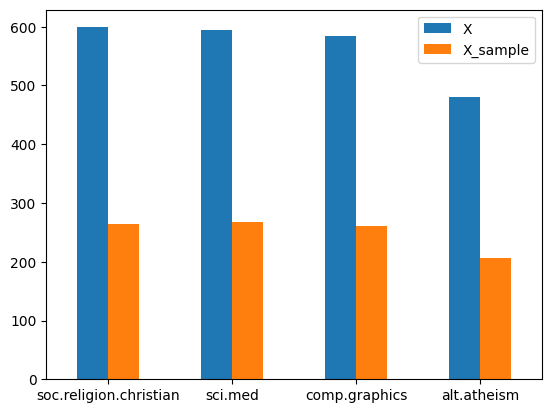

In [190]:
df = pd.DataFrame({'X': X.category_name.value_counts(), 'X_sample': X_sample.category_name.value_counts()}, index=["soc.religion.christian", "sci.med", "comp.graphics", "alt.atheism"])

df.plot.bar(rot=0)

#### **Exercise 10**

We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

---

In [191]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()

X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

X_sub_counts = X_counts[4, 0:100].toarray()

X_sub_counts


array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [192]:
np.nonzero(X_sub_counts)

(array([0, 0], dtype=int64), array([ 0, 37], dtype=int64))

In [193]:
count_vect.get_feature_names_out()[37]

'01'

#### **Exercise 11**

From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

---

In [194]:
import scipy.sparse as sp

df_0 = X_counts[:200]
df_1 = X_counts[200:400]
df_2 = X_counts[400:600]
df_3 = X_counts[600:800]
df_4 = X_counts[800:1000]
df_5 = X_counts[1000:1200]
df_6 = X_counts[1200:1400]
df_7 = X_counts[1400:1600]
df_8 = X_counts[1600:1800]
df_9 = X_counts[1800:]

df_0 = pd.DataFrame(df_0.sum(axis=0).tolist())
df_1 = pd.DataFrame(df_1.sum(axis=0).tolist())
df_2 = pd.DataFrame(df_2.sum(axis=0).tolist())
df_3 = pd.DataFrame(df_3.sum(axis=0).tolist())
df_4 = pd.DataFrame(df_4.sum(axis=0).tolist())
df_5 = pd.DataFrame(df_5.sum(axis=0).tolist())
df_6 = pd.DataFrame(df_6.sum(axis=0).tolist())
df_7 = pd.DataFrame(df_7.sum(axis=0).tolist())
df_8 = pd.DataFrame(df_8.sum(axis=0).tolist())
df_9 = pd.DataFrame(df_9.sum(axis=0).tolist())

c0 = pd.concat([df_0, df_1], axis=0)
c1 = pd.concat([c0,   df_2], axis=0)
c2 = pd.concat([c1,   df_3], axis=0)
c3 = pd.concat([c2,   df_4], axis=0)
c4 = pd.concat([c3,   df_5], axis=0)
c5 = pd.concat([c4,   df_6], axis=0)
c6 = pd.concat([c5,   df_7], axis=0)
c7 = pd.concat([c6,   df_8], axis=0)
X_counts_combine = sp.vstack((c7, df_9))

X_counts_combine = X_counts_combine.tocsr()
X_counts_combine = pd.DataFrame(X_counts_combine.toarray())
X_counts_combine

,0,1,2,3,4,5,6,7,8,9,...,35778,35779,35780,35781,35782,35783,35784,35785,35786,35787
0,7,5,0,0,0,0,0,0,0,0,...,0,0,2,1,1,0,0,0,0,0
1,14,3,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,15,25,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,11,11,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,14,2,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,1,0,0
5,17,4,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,5,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,5,20,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
8,19,2,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
9,27,20,0,0,1,1,1,1,0,0,...,1,0,0,2,0,2,0,0,0,0


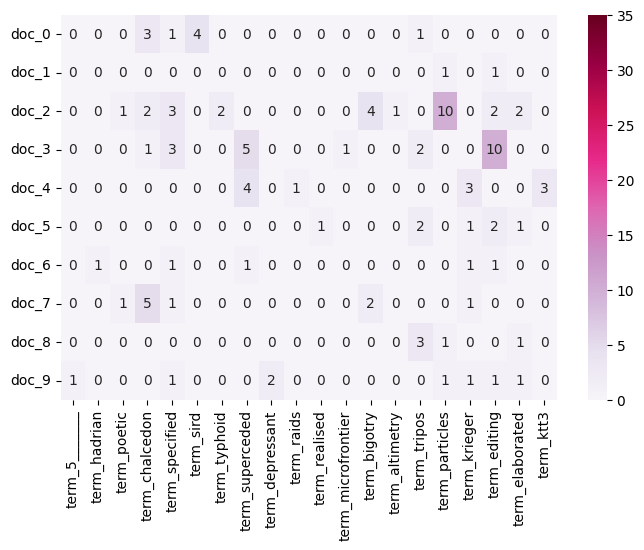

In [195]:
from matplotlib import pyplot as plt
import random
import seaborn as sns

# random choice twenty features
selection = random.sample(range(35788), 20)
plot_x = ["term_"+str(count_vect.get_feature_names_out()[i]) for i in selection]

# obtain document index
plot_y = ["doc_"+ str(i) for i in range(10)] #len=2257

plot_z = X_counts_combine.loc[0:10, selection].values.tolist()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)

plt.subplots(figsize=(8, 5))
sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=35, annot=True)

plt.show()


#### **Exercise 12**

Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to [Axes3D](https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.html) in the documentation.

---

In [196]:
from sklearn.decomposition import PCA

X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

X_reduced.shape

(2257, 3)

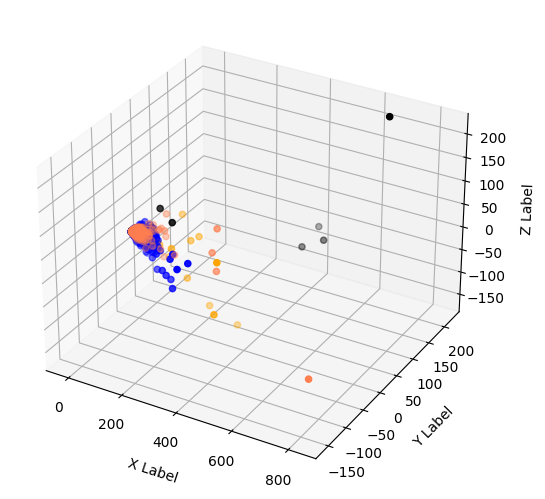

In [197]:
#plot 1

from mpl_toolkits.mplot3d.axes3d import Axes3D

col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure() #創建一個畫布

ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()


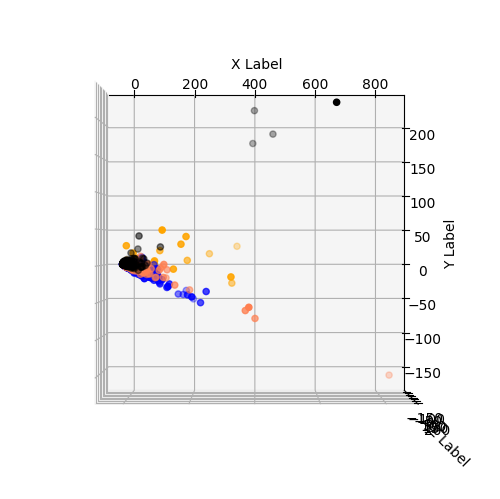

In [198]:
#plot 2

from mpl_toolkits.mplot3d.axes3d import Axes3D

col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure() #創建一個畫布

ax = Axes3D(fig, auto_add_to_figure=False, elev=90, azim=270)
fig.add_axes(ax)

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()


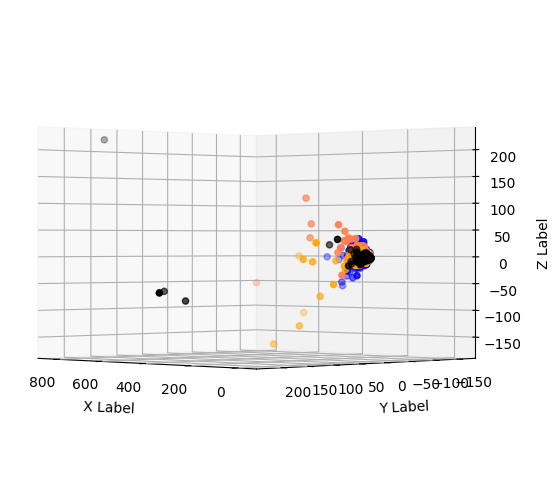

In [199]:
#plot 3

from mpl_toolkits.mplot3d.axes3d import Axes3D

col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure() #創建一個畫布

ax = Axes3D(fig, auto_add_to_figure=False, elev=0, azim=135)
fig.add_axes(ax)

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

#### **Exercise 13**

If you want a nicer interactive visualization here, I would encourage you try to install and use [plotly](https://plotly.com/python/bar-charts/) to achieve this.

---

In [200]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0, X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [201]:
import plotly.express as px

fig = px.bar(term_frequencies[:300], x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300], labels = {'x':'Terms', 'y':'Frequencies'})

fig.show()

#### **Exercise 14**

The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

---

In [202]:
freqDF = pd.DataFrame(count_vect.get_feature_names_out(), columns= ['terms'])
freqDF['frequency'] = term_frequencies

# sort
freqDF = freqDF.sort_values(by=['frequency'], ascending=False)

fig = px.bar(freqDF[:15], x=freqDF['terms'][:15], y=freqDF['frequency'][:15], title  = "TOP10 Term Frequencies", labels = {'x':'Terms', 'y':'Frequencies'})

fig.show()



#### **Exercise 15**

Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses).


---

In [203]:
freqDF

,terms,frequency
32142,the,29825
23610,of,17660
32493,to,17222
4992,and,13017
18474,is,12343
...,...,...
24661,pcb,1
24662,pcboard,1
24663,pccvm,1
24664,pcd7,1


In [204]:
fig = px.bar(freqDF[:100], x=freqDF['terms'][:100], y=freqDF['frequency'][:100], labels = {'x':'Terms', 'y':'Frequencies'})

fig.show()

#### **Exercise 16**

Try to generate the binarization using the `category_name` column instead. Does it work? -> Yes

---

In [205]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()

mlb.fit(X.category)

X['bin_category (category)'] = mlb.transform(X['category']).tolist()

mlb.fit(X.category_name)

X['bin_category (category_name)'] = mlb.transform(X['category_name']).tolist()

X[0:9]

,text,category,category_name,bin_category (category),bin_category (category_name)
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]","[0, 0, 1, 0]"
